In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('advertising.csv')

**Data Preprocessing**

In [8]:
df.shape

(200, 4)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


CHECKING FOR NULL VALUES IN THE DATASET

In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Exploratory Data Analysis**

Text(0.5, 1.0, 'Box Plot')

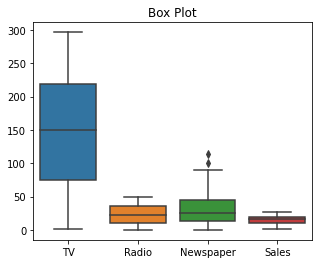

In [73]:
plt.figure(figsize=(5,4))
sns.boxplot(data=df)
plt.title('Box Plot')

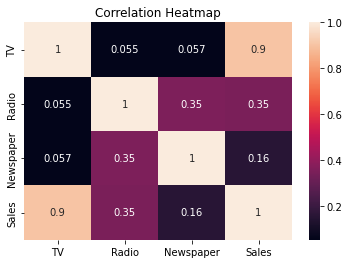

In [26]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

*Findings From HeatMap*
TV vs Sales= Strong positive 0.9 correlation
Radio vs Sales= Moderate postive 0.35 correlation
Newspaper vs Sales= Weak 0.16 correlation

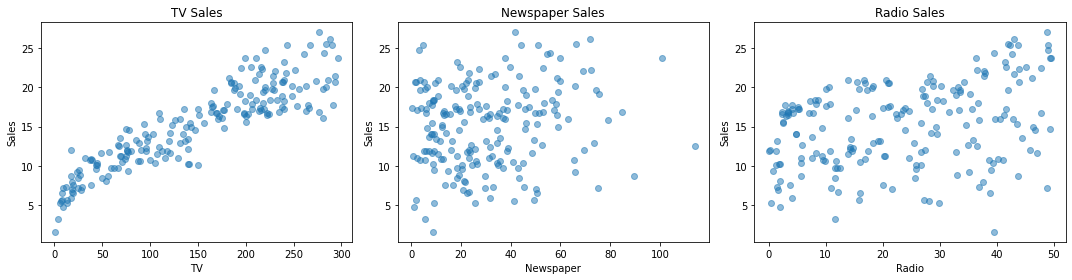

In [74]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(df["TV"],df["Sales"],alpha=0.5)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV Sales")
plt.subplot(1,3,2)
plt.scatter(df["Newspaper"],df["Sales"],alpha=0.5)
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Newspaper Sales")
plt.subplot(1,3,3)
plt.scatter(df["Radio"],df["Sales"],alpha=0.5)
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Radio Sales")
plt.tight_layout()
plt.show()

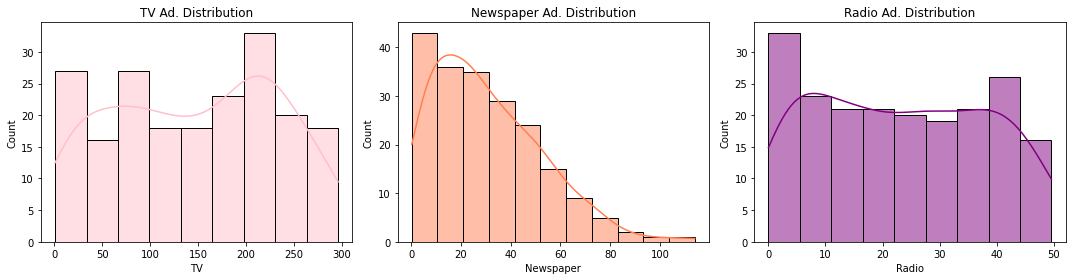

In [54]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.histplot(df['TV'],kde='true',color='pink')
plt.title('TV Ad. Distribution')
plt.subplot(1,3,2)
sns.histplot(df['Newspaper'],kde='true',color='coral')
plt.title('Newspaper Ad. Distribution')
plt.subplot(1,3,3)
sns.histplot(df['Radio'],kde='true',color='purple')
plt.title('Radio Ad. Distribution')
plt.tight_layout()
plt.show()

**Model Training**

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [75]:
# Extract feature and target arrays
X, y = df.drop('Sales', axis=1), df[['Sales']]

In [84]:
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [85]:
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [76]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [91]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [93]:
y_pred = linear_model.predict(X_test)


In [94]:
# Model Evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2.2789251586850012
R2 Score: 0.9048917241361681


Lower MSE indicates better model performance.
Higher value of R2 indicating a better fit of the model.

In [95]:
from xgboost import XGBRegressor

In [97]:
xgb_model = XGBRegressor(random_state=42)

In [98]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [100]:
y_pred = xgb_model.predict(X_test)

In [101]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 1.1885712003635103
R2 Score: 0.9503963712115903
